In [1]:
#%% Import libraries
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import ast
from scipy.ndimage import gaussian_filter
import pickle
import scipy.stats

In [2]:
#%%
errors = np.zeros((768))
its = np.zeros((768))
mts = np.zeros((768))

In [3]:
#%%
def euclidean_dist(df):
    errors = list()
    for i in range(len(df)):
        errors.append(np.sqrt((df['target_x'][i] - df['transfer_mouse.x'][i][-1])**2 + (df['target_y'][i] - df['transfer_mouse.y'][i][-1])**2))        

    return errors       
def angular_dist(vec1, vec2):
    uv1 = vec1/np.linalg.norm(vec1)
    uv2 = vec2/np.linalg.norm(vec2)
    dot_prod = np.dot(uv1, uv2)
    return np.arccos(dot_prod)

def rotate(x, y, angle):
    radians = (np.pi/180)*angle
    cos_val = np.cos(radians)
    sin_val = np.sin(radians)
    nx = x*cos_val + y*sin_val
    ny = y*cos_val - x*sin_val
    return [nx, ny];


In [19]:
import os
os.getcwd()

'C:\\Users\\Tejas\\Documents\\Lab-Codes\\Visuomotor_Adaptation_psychopy_tablet\\no_feedback\\analysis'

In [116]:
data = pd.read_csv('data/2010.csv')

In [117]:
data_baseline = data.dropna(subset = ['baseline_mouse.x'], inplace = False)
data_baseline.dropna('columns', inplace = True)
data_baseline.reset_index(drop = True, inplace = True)


<ipython-input-117-5183793939cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_baseline.dropna('columns', inplace = True)


In [118]:
data_baseline.columns

Index(['target_x', 'target_y', 'rotation', 'baseline_trials.thisRepN',
       'baseline_trials.thisTrialN', 'baseline_trials.thisN',
       'baseline_trials.thisIndex', 'baseline_enclosing_1.started',
       'baseline_enclosing_1.stopped', 'baseline_enclosing.started',
       'baseline_enclosing.stopped', 'baseline_target.started',
       'baseline_target.stopped', 'baseline_fixation.started',
       'baseline_fixation.stopped', 'baseline_mouse.x', 'baseline_mouse.y',
       'baseline_mouse.leftButton', 'baseline_mouse.midButton',
       'baseline_mouse.rightButton', 'baseline_mouse.time',
       'baseline_mouse.started', 'baseline_mouse.stopped',
       'baseline_enclosing_feedback_1.started',
       'baseline_enclosing_feedback_1.stopped',
       'baseline_enclosing_feedback.started',
       'baseline_enclosing_feedback.stopped',
       'baseline_target_feedback.started', 'baseline_target_feedback.stopped',
       'baseline_fixation_feedback.started',
       'baseline_fixation_feedba

In [119]:
def data_cleanup(data):
    #Preliminary cleanup. Includes dropping NAs, separating in three sets and resetting indices to start from 0
    data_baseline = data.dropna(subset = ['baseline_mouse.x'], inplace = False)
    data_baseline.dropna('columns', inplace = True)
    data_baseline.reset_index(drop = True, inplace = True)
    
    data_rotated = data.dropna(subset = ['rotated_mouse.x'], inplace = False)
    data_rotated.dropna('columns', inplace = True)
    data_rotated.reset_index(drop = True, inplace = True)
    
    data_transfer = data.dropna(subset = ['transfer_mouse.x'], inplace = False)
    data_transfer.dropna('columns', inplace = True)
    data_transfer.reset_index(drop = True, inplace = True)
    
    #Convert string lists to regular lists
    for column in data_rotated.columns:
        try:
            data_rotated[column] = data_rotated[column].apply(ast.literal_eval)
        except:
            print(column)
    for column in data_baseline.columns:
        try:
            data_baseline[column] = data_baseline[column].apply(ast.literal_eval)
        except:
            print(column)
    for column in data_transfer.columns:
        try:
            data_transfer[column] = data_transfer[column].apply(ast.literal_eval)            
        except:
            print(column)


    return data_baseline, data_rotated, data_transfer

In [120]:
data_baseline, data_rotated, data_transfer = data_cleanup(data)

<ipython-input-119-99337c7f6ea1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_baseline.dropna('columns', inplace = True)
<ipython-input-119-99337c7f6ea1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rotated.dropna('columns', inplace = True)
<ipython-input-119-99337c7f6ea1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_transfer.dropna('columns', inplace = True)
<ipython-input-119-99337c7f6ea1>:18: SettingWithC

target_x
target_y
rotation
blocks.thisRepN
blocks.thisTrialN
blocks.thisN
blocks.thisIndex
block_trials.thisRepN
block_trials.thisTrialN
block_trials.thisN
block_trials.thisIndex
rotated_enclosing_1.started
rotated_enclosing.started
rotated_fixation.started
rotated_enclosing_feedback_1.started
rotated_enclosing_feedback.started
rotated_target_feedback.started
rotated_fixation_feedback.started
rotated_fixation_feedback.stopped
rotated_score_text.started
participant
session
date
expName
psychopyVersion
frameRate
target_x
target_y
rotation
baseline_trials.thisRepN
baseline_trials.thisTrialN
baseline_trials.thisN
baseline_trials.thisIndex
baseline_enclosing_1.started
baseline_enclosing.started
baseline_target.started
baseline_fixation.started


<ipython-input-119-99337c7f6ea1>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_baseline[column] = data_baseline[column].apply(ast.literal_eval)


baseline_mouse.started
baseline_enclosing_feedback_1.started
baseline_enclosing_feedback.started
baseline_target_feedback.started
baseline_fixation_feedback.started
baseline_fixation_feedback.stopped
baseline_score_text.started
participant
session
date
expName
psychopyVersion
frameRate
target_x
target_y
rotation
transfer_trials.thisRepN
transfer_trials.thisTrialN
transfer_trials.thisN
transfer_trials.thisIndex
transfer_enclosing_1.started
transfer_enclosing.started
transfer_target.started
transfer_fixation.started


<ipython-input-119-99337c7f6ea1>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_transfer[column] = data_transfer[column].apply(ast.literal_eval)


transfer_mouse.started
transfer_enclosing_feedback_1.started
transfer_enclosing_feedback.started
transfer_target_feedback.started
transfer_fixation_feedback.started
transfer_fixation_feedback.stopped
text_4.started
participant
session
date
expName
psychopyVersion
frameRate


In [125]:
baseline_fix_pos = np.zeros((64, 2))
for trial in range(64):
    try:
        baseline_fix_pos[trial][:] = np.array(rotate(data_baseline['baseline_mouse.x'][trial][-1], data_baseline['baseline_mouse.y'][trial][-1], 0))        
    except:
        print('here')

rotated_fix_pos = np.zeros((640, 2))
for trial in range(640):
    try:
        rotated_fix_pos[trial][:] = np.array(rotate(data_rotated['rotated_mouse.x'][trial][-1], data_rotated['rotated_mouse.y'][trial][-1], 90))        
    except:
        print('here')
        
transfer_fix_pos = np.zeros((64, 2))
for trial in range(64):
    try:
        transfer_fix_pos[trial][:] = np.array(rotate(data_transfer['transfer_mouse.x'][trial][-1], data_transfer['transfer_mouse.y'][trial][-1], 0))        
    except:
        print('here')


here


In [126]:
trial = 55
transfer_fix_pos[trial], (data_transfer['target_x'][trial],data_transfer['target_y'][trial])

(array([0.19537037, 0.02592593]), (0.3, 0.3))

In [127]:
errors = np.zeros(768)
ang_errors = np.zeros(768)
for trial in range(64):
    errors[trial] = np.sqrt((baseline_fix_pos[trial][0] - data_baseline['target_x'][trial])**2 + (baseline_fix_pos[trial][1] - data_baseline['target_y'][trial])**2)
    ang_errors[trial] = angular_dist(baseline_fix_pos[trial], [data_baseline['target_x'][trial], data_baseline['target_y'][trial]])
for trial in range(640):
    errors[trial+64] = np.sqrt((rotated_fix_pos[trial][0] - data_rotated['target_x'][trial])**2 + (rotated_fix_pos[trial][1] - data_rotated['target_y'][trial])**2)
    ang_errors[trial+64] = angular_dist(rotated_fix_pos[trial], [data_rotated['target_x'][trial], data_rotated['target_y'][trial]])
for trial in range(64):
    errors[trial+704] = np.sqrt((transfer_fix_pos[trial][0] - data_transfer['target_x'][trial])**2 + (transfer_fix_pos[trial][1] - data_transfer['target_y'][trial])**2)
    ang_errors[trial+704] = angular_dist(transfer_fix_pos[trial], [data_transfer['target_x'][trial], data_transfer['target_y'][trial]])
    

<ipython-input-3-37506489b2d9>:9: RuntimeWarning: invalid value encountered in true_divide
  uv1 = vec1/np.linalg.norm(vec1)


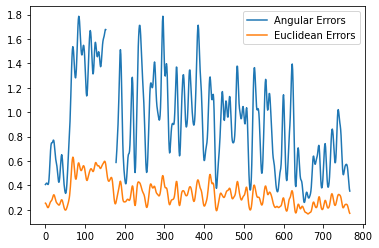

In [128]:
plt_angular, = plt.plot(gaussian_filter(ang_errors, sigma = 3))
plt_euclidean, = plt.plot(gaussian_filter(errors, sigma = 3))
plt.legend((plt_angular, plt_euclidean), ('Angular Errors', "Euclidean Errors"))

In [57]:
baseline_fix_pos[2]

array([0., 0.])

In [82]:
data_transfer['target_x']

0     0.3
1    -0.3
2     0.3
3    -0.3
4    -0.3
     ... 
59    0.3
60    0.3
61   -0.3
62    0.3
63    0.3
Name: target_x, Length: 64, dtype: float64

# RTs

In [130]:
data_baseline.columns

Index(['target_x', 'target_y', 'rotation', 'baseline_trials.thisRepN',
       'baseline_trials.thisTrialN', 'baseline_trials.thisN',
       'baseline_trials.thisIndex', 'baseline_enclosing_1.started',
       'baseline_enclosing_1.stopped', 'baseline_enclosing.started',
       'baseline_enclosing.stopped', 'baseline_target.started',
       'baseline_target.stopped', 'baseline_fixation.started',
       'baseline_fixation.stopped', 'baseline_mouse.x', 'baseline_mouse.y',
       'baseline_mouse.leftButton', 'baseline_mouse.midButton',
       'baseline_mouse.rightButton', 'baseline_mouse.time',
       'baseline_mouse.started', 'baseline_mouse.stopped',
       'baseline_enclosing_feedback_1.started',
       'baseline_enclosing_feedback_1.stopped',
       'baseline_enclosing_feedback.started',
       'baseline_enclosing_feedback.stopped',
       'baseline_target_feedback.started', 'baseline_target_feedback.stopped',
       'baseline_fixation_feedback.started',
       'baseline_fixation_feedba

In [132]:
data_baseline['baseline_target.started']

0     2158.511954
1     2162.784457
2     2165.115824
3     2168.287687
4     2173.010395
         ...     
59    2349.903919
60    2355.587252
61    2366.873903
62    2374.738469
63    2377.540125
Name: baseline_target.started, Length: 64, dtype: float64